Step 1. 이것만큼은 꼭 해보세요!
프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제하되, 아래 내용만큼은 반드시 실습해봅시다.

결측치 판단 및 처리
[힌트] 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.

이상치 판단 및 처리
[힌트] 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 
그려보고 이상치가 관찰될 경우 제거합니다.

Step 2. 이런것도 해볼 수 있어요!
자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.
[힌트] 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?
Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
taxi_data = pd.read_csv(r'D:\2024\공부\AI아이펠\공부\DATA\240119_taxi\trip.csv')
taxi_data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [122]:
taxi_data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [123]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


1. 먼저 중복된 데이터가 있는지 검사합니다. 

In [124]:
taxi_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22696    False
22697    False
22698    False
22699    False
22700    False
Length: 22701, dtype: bool

In [125]:
taxi_data[taxi_data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


두 개 밖에 없네요. 두 개 모두 정말 중복된 데이터가 맞는지 봅니다.

1. Sarah Gross 씨의 경우 

In [126]:
taxi_data[taxi_data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


완전히 동일합니다. 결제가 두 번 되었을까... 그런건 신경쓰지 않아도 될 것 같으니
다음 데이터도 동일한지 봅니다.

2. Lisa Bullock씨의 경우 

In [127]:
taxi_data[taxi_data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


완전히 동일합니다. 삭제를 진행합니다.

In [128]:
taxi_data2 = taxi_data.drop_duplicates()

제거되었으니 이제 'taxi_data2'라는 이름으로 실행하겠습니다.

In [129]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


원본 데이터와 비교하면 2개가 줄은 것을 확인할 수 있습니다.

In [130]:
taxi_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22699 non-null  object 
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   payment_method         22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   fare_amount            22696 non-null  float64
 7   tip_amount             22699 non-null  float64
 8   tolls_amount           22699 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.7+ MB


In [131]:
taxi_data2.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


이제 null 값을 찾아서 지워주고 싶지만 순서를 지키지 않으면 헷갈리니
분석에 있어서 의미 없는 데이터를 지워주겠습니다.
여기 보면 이름은 딱히 큰 의미가 없습니다. 특정 이름을 가진 사람이 택시를 잘 타고다닐리는 없으니까요.(...있으려나?)
그럼 이름을 지워주겠습니다. 안녕 

In [132]:
taxi_data2.drop('passenger_name', axis=1)

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


오오 깔끔하네요. 그치만 이렇게 지워주면 저장이 안되니 저장! 

In [133]:
taxi_data2.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [134]:
taxi_data2 = taxi_data2.drop('passenger_name', axis=1)

In [135]:
taxi_data2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


이제 결측치 NAN 값을 찾으러 갑니다.

In [136]:
taxi_data2.isna()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
22696,False,False,False,False,False,False,False,False
22697,False,False,False,False,False,False,False,False
22698,False,False,False,False,False,False,False,False
22699,False,False,False,False,False,False,False,False


In [137]:
taxi_data2.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

'fare_amount' 에 Null 값이 3개나 나오네요. 지워주러 갑니다.

In [138]:
taxi_data2[taxi_data2['fare_amount'].isna()]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


요금 값이 없다니.. 신기하네요. 지워주겠습니다. 

일단 위에 애들의 인덱스를 따보겠습니다. 

In [139]:
taxi_data2[taxi_data2['fare_amount'].isna()].index

Int64Index([52, 189, 244], dtype='int64')

In [140]:
fare_na_index = taxi_data2[taxi_data2['fare_amount'].isna()].index

In [141]:
fare_na_index

Int64Index([52, 189, 244], dtype='int64')

In [142]:
taxi_data2.loc[fare_na_index]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
52,04/04/2017 4:22:03 PM,04/04/2017 4:35:30 PM,Cash,1,2.20,NaN,0.0,0.00
189,08/21/2017 12:40:25 PM,08/21/2017 1:12:31 PM,Debit Card,3,15.20,NaN,5.0,0.00
244,08/09/2017 8:32:09 AM,08/09/2017 9:31:11 AM,Cash,1,15.89,NaN,10.0,5.76


In [143]:
taxi_data2.dropna() 
#null value가 있는 모든 데이터들을 지워라

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [144]:
#저장
taxi_data2 = taxi_data2.dropna() 

In [145]:
taxi_data2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [146]:
taxi_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22696 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tpep_pickup_datetime   22696 non-null  object 
 1   tpep_dropoff_datetime  22696 non-null  object 
 2   payment_method         22696 non-null  object 
 3   passenger_count        22696 non-null  int64  
 4   trip_distance          22696 non-null  float64
 5   fare_amount            22696 non-null  float64
 6   tip_amount             22696 non-null  float64
 7   tolls_amount           22696 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.6+ MB


In [147]:
taxi_data2[taxi_data2['fare_amount'].isna()]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


짜잔, 지워졌죠

이제 이상한 애들을 지우러갑니다.

In [148]:
taxi_data2.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.643638,2.912231,13.023681,1.835363,0.312329
std,1.305027,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


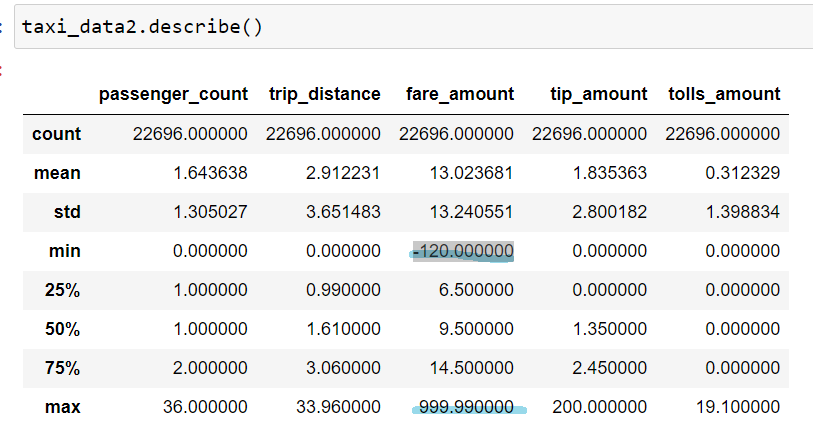

저 분들은 도대체 미터기에 무슨 짓을 하신거죠? 아니면 
뭐 전세 택시일까요?

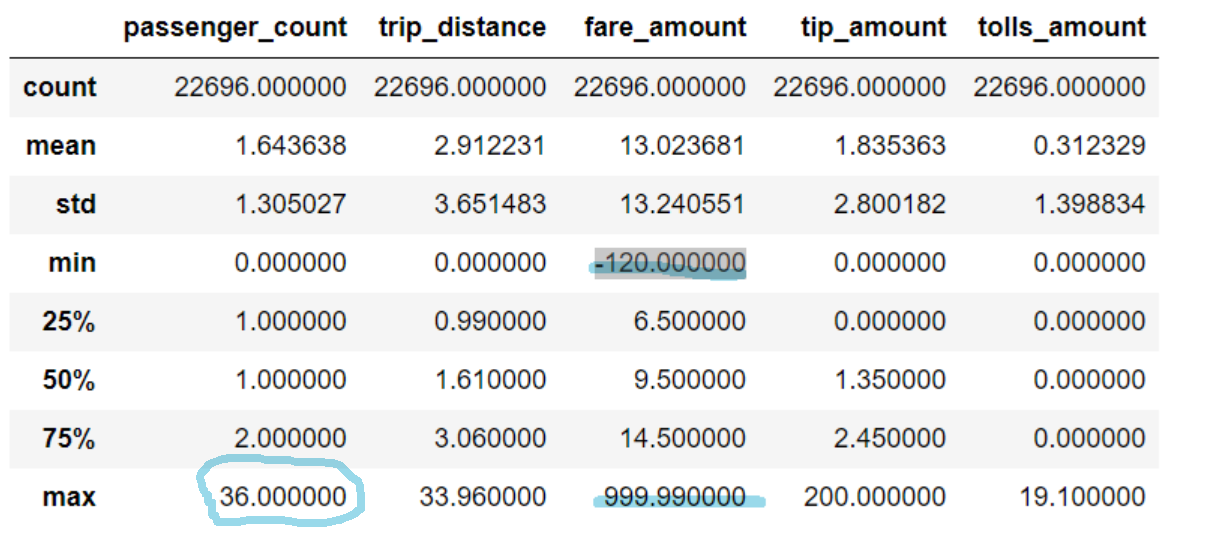

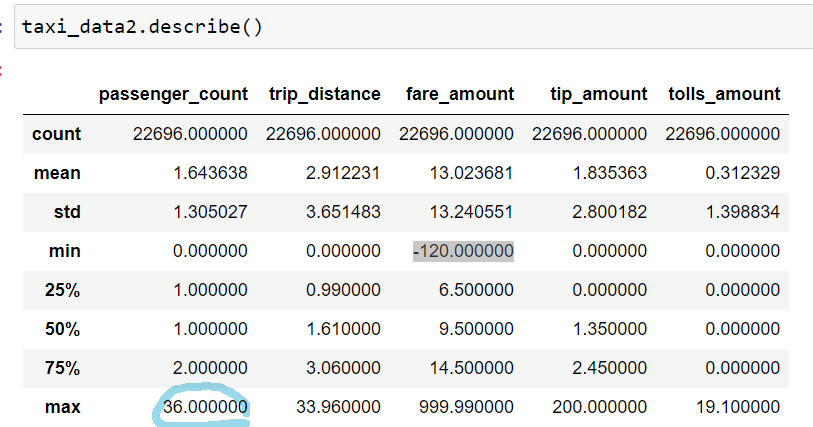

제가 알기론 passenger_count는 탑승객 승객인데 
관광버스의 데이터라도 섞여있는 걸까요? 

저는 그래프를 좋아하니 그래프를 소환합니다. 

In [149]:
taxi_data2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


C:\Users\pig30n77\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


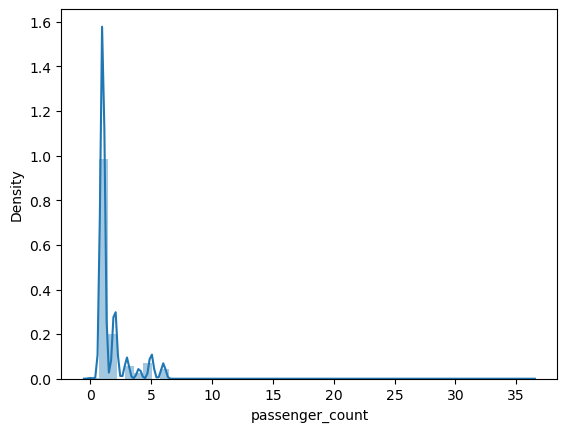

In [150]:
sns.distplot(taxi_data['passenger_count'])
plt.show()

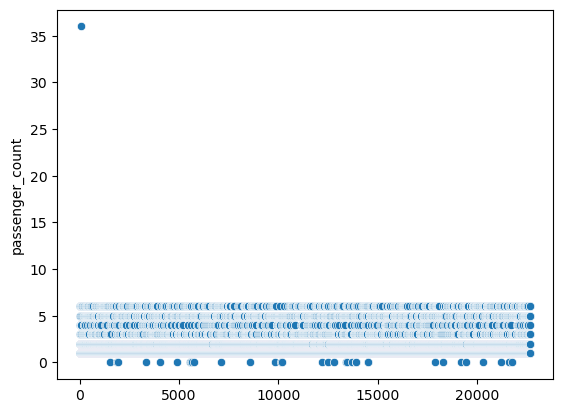

In [151]:
sns.scatterplot(x = taxi_data2.index, y= taxi_data2['passenger_count'])
plt.show()

확실히 튀는 값이 보입니다. 저 위에 35라고 찍혀있네요 

In [152]:
taxi_data2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


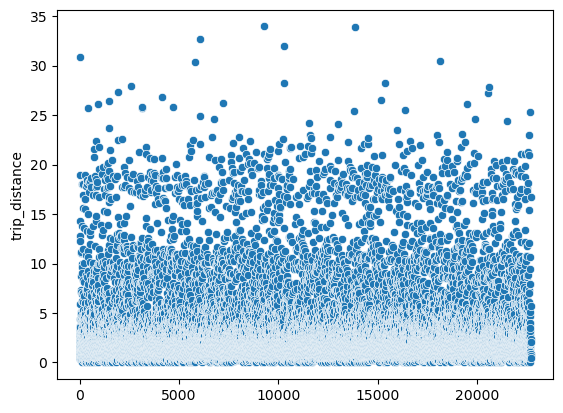

In [153]:
sns.scatterplot(x = taxi_data2.index, y= taxi_data2['trip_distance'])
plt.show()

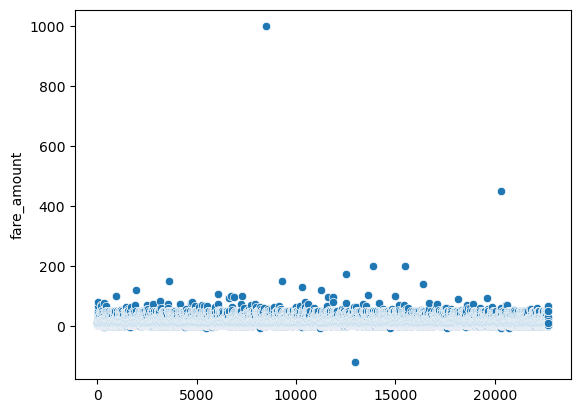

In [154]:
sns.scatterplot(x = taxi_data2.index, y= taxi_data2['fare_amount']) 
plt.show()

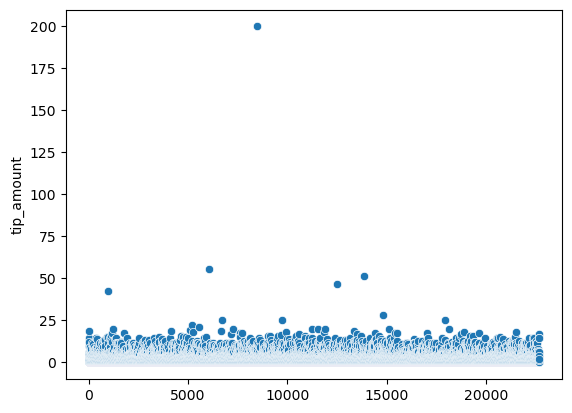

In [155]:
sns.scatterplot(x = taxi_data2.index, y= taxi_data2['tip_amount']) 
plt.show()

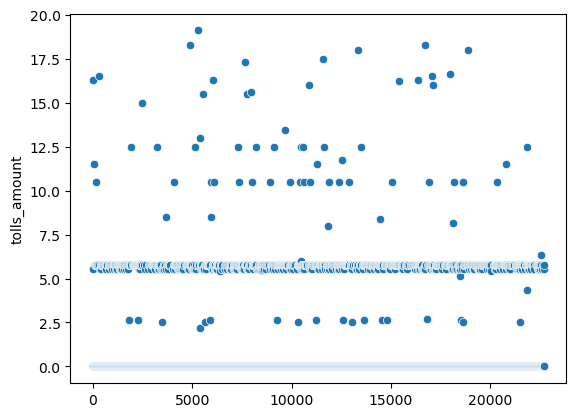

In [156]:
sns.scatterplot(x = taxi_data2.index, y= taxi_data2['tolls_amount']) 
plt.show()

'passenger_count', fare_amount , tip_amount 가 이상값이 보입니다.
확인해주겠습니다. 

조금 편협한 생각을 하겠습니다. 이 택시들은 모두 일반승용차라고 가정하겠습니다.
가끔 크기가 더 큰 택시가 있지만.. 여기서는 편협하게 생각 안 하겠습니다.
그래서 꽉꽉 탄다는 가정하에 
기사님 자리 제외하고 최대 뒷자리 3명, 앞자리 1명을 태우겠습니다. 

In [157]:
taxi_data2['passenger_count'] <= 4

0        False
1         True
2         True
3         True
4         True
         ...  
22696     True
22697     True
22698     True
22699     True
22700     True
Name: passenger_count, Length: 22696, dtype: bool

In [158]:
taxi_data2['passenger_count'].sort_values().tail()

416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, dtype: int64

생각보다 6명인 데이터도 많네요. 편협하지 않게 6명까지는 봐주겠습니다. 
그리고 36명인 데이터는 1개밖에 없습니다. 삭제할까 하다가 6명으로 그냥 하겠습니다. 

In [159]:
#함수 만들기 1 

def pas_func(x):
    if x > 6:
        return 6
    else:
        return x

In [160]:
#함수 만들기 2 

In [161]:
taxi_data2['passenger_count'].apply(lambda x: 6 if x >6 else x)

0        6
1        1
2        1
3        1
4        1
        ..
22696    3
22697    1
22698    1
22699    1
22700    1
Name: passenger_count, Length: 22696, dtype: int64

In [162]:
taxi_data2['passenger_count'].apply(pas_func).max()

6

In [163]:
저장해주것소 

NameError: name '저장해주것소' is not defined

In [164]:
taxi_data2['passenger_count'] =taxi_data2['passenger_count'].apply(lambda x: 6 if x >6 else x)

In [165]:
taxi_data2['passenger_count'].sort_values().tail()

416      6
4322     6
414      6
10987    6
0        6
Name: passenger_count, dtype: int64

ㅡpassenger_count 데이터는 끝났으니 이제 다른 데이터를 건들겠소


In [166]:
taxi_data2['fare_amount'].sort_values().tail()

12513    175.00
15476    200.00
13863    200.01
20314    450.00
8478     999.99
Name: fare_amount, dtype: float64

In [167]:
taxi_data2[taxi_data2['fare_amount'] == 999.99]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
8478,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.6,999.99,200.0,0.0


In [168]:
#다른 승객의 거리에 비해서 너무너무 요금을 많이 냈습니다. 안타깝게도 바가지를 씌인게 틀림 없습니다! 

In [169]:
taxi_data2.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22696.000000,22696.000000,22696.000000,22696.000000,22696.000000
mean,1.642316,2.912231,13.023681,1.835363,0.312329
std,1.285270,3.651483,13.240551,2.800182,1.398834
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


In [170]:
taxi_data2[taxi_data2['trip_distance'] == 2.6]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
53,01/05/2017 2:56:32 PM,01/05/2017 3:24:31 PM,Cash,2,2.6,17.5,0.00,0.0
133,11/24/2017 3:17:47 PM,11/24/2017 3:33:57 PM,Credit Card,1,2.6,13.0,0.00,0.0
160,04/21/2017 11:15:54 PM,04/21/2017 11:27:41 PM,Cash,1,2.6,11.0,3.00,0.0
292,11/24/2017 5:26:07 PM,11/24/2017 5:51:18 PM,Cash,1,2.6,17.0,0.00,0.0
384,11/04/2017 4:02:42 AM,11/04/2017 4:10:52 AM,Cash,1,2.6,10.5,0.00,0.0
...,...,...,...,...,...,...,...,...
22113,12/17/2017 2:30:19 PM,12/17/2017 2:52:48 PM,Cash,4,2.6,15.5,1.63,0.0
22266,12/24/2017 9:20:21 AM,12/24/2017 9:29:33 AM,Debit Card,1,2.6,10.0,2.15,0.0
22289,02/25/2017 4:25:39 PM,02/25/2017 4:42:39 PM,Cash,1,2.6,13.0,2.75,0.0
22318,04/19/2017 8:10:42 PM,04/19/2017 8:22:54 PM,Cash,4,2.6,11.0,3.00,0.0


In [171]:
#같은 거리에대해서 142개의 데이터가 있습니다. 얘네들의 평균or중앙 값으로 변경하겠습니다.
#일단 얘네들의 중앙/평균값을 찾아야겠죠? 

In [172]:
운행거리같음 = taxi_data2[taxi_data2['trip_distance'] == 2.6] 

In [173]:
운행거리같음

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
53,01/05/2017 2:56:32 PM,01/05/2017 3:24:31 PM,Cash,2,2.6,17.5,0.00,0.0
133,11/24/2017 3:17:47 PM,11/24/2017 3:33:57 PM,Credit Card,1,2.6,13.0,0.00,0.0
160,04/21/2017 11:15:54 PM,04/21/2017 11:27:41 PM,Cash,1,2.6,11.0,3.00,0.0
292,11/24/2017 5:26:07 PM,11/24/2017 5:51:18 PM,Cash,1,2.6,17.0,0.00,0.0
384,11/04/2017 4:02:42 AM,11/04/2017 4:10:52 AM,Cash,1,2.6,10.5,0.00,0.0
...,...,...,...,...,...,...,...,...
22113,12/17/2017 2:30:19 PM,12/17/2017 2:52:48 PM,Cash,4,2.6,15.5,1.63,0.0
22266,12/24/2017 9:20:21 AM,12/24/2017 9:29:33 AM,Debit Card,1,2.6,10.0,2.15,0.0
22289,02/25/2017 4:25:39 PM,02/25/2017 4:42:39 PM,Cash,1,2.6,13.0,2.75,0.0
22318,04/19/2017 8:10:42 PM,04/19/2017 8:22:54 PM,Cash,4,2.6,11.0,3.00,0.0


In [174]:
운행거리같음.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,142.000000,1.420000e+02,142.000000,142.000000,142.0
mean,1.309859,2.600000e+00,19.936549,3.195282,0.0
std,0.735938,4.456612e-15,82.869732,16.690043,0.0
min,1.000000,2.600000e+00,9.000000,0.000000,0.0
25%,1.000000,2.600000e+00,11.000000,0.000000,0.0
50%,1.000000,2.600000e+00,12.500000,2.250000,0.0
75%,1.000000,2.600000e+00,14.500000,2.825000,0.0
max,4.000000,2.600000e+00,999.990000,200.000000,0.0


trip_distance 의 중앙값으로 채울겁니다. 
중앙값은 '12.500000' 입니다.8478번의 금액(fare_amount)을 12.5로 바꿔줄 겁니다. 

In [175]:
# taxi_data2.apply(lambda x: 12.5 if x > 998 else x)
taxi_data2['fare_amount'].apply(lambda x: 12.5 if x > 998 else x)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22696, dtype: float64

In [176]:
taxi_data2['fare_amount'] =taxi_data2['fare_amount'].apply(lambda x: 12.5 if x > 998 else x)

In [177]:
taxi_data2[taxi_data2['fare_amount'] == 999.99]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [178]:
#이제 그 데이터는 없습니다. 

taxi_data2.head()

In [179]:
taxi_data2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [180]:
taxi_data2.loc[8478]

tpep_pickup_datetime     02/06/2017 5:50:10 AM
tpep_dropoff_datetime    02/06/2017 5:51:08 AM
payment_method                     Credit Card
passenger_count                              1
trip_distance                              2.6
fare_amount                               12.5
tip_amount                               200.0
tolls_amount                               0.0
Name: 8478, dtype: object

#12.5로 바뀐 것을 볼 수 있습니다.
다시 그래프를 열어주겠습니다.

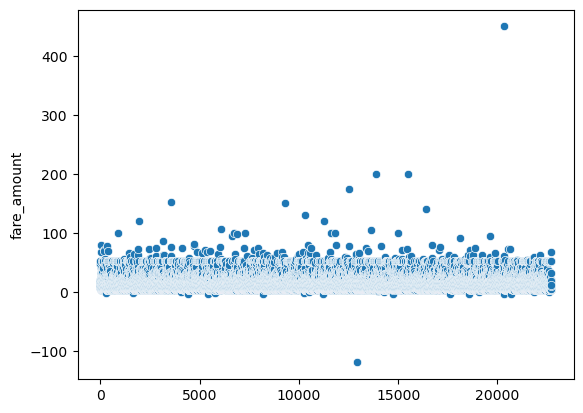

In [181]:
sns.scatterplot(x = taxi_data2.index, y= taxi_data2['fare_amount']) 
plt.show()

이번에는 위에서 튀는 값 하나, 또 아래에서 튀는 값들이 있네요. 아까처럼 각각 봐주겠습니다.

In [182]:
taxi_data2['fare_amount'].sort_values().tail()

3584     152.00
12513    175.00
15476    200.00
13863    200.01
20314    450.00
Name: fare_amount, dtype: float64

In [183]:
taxi_data2[taxi_data2['fare_amount'] == 450.00]

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
20314,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.0,450.0,0.0,0.0


In [184]:
매우 수상한 데이터네요. 거리가 0인데 450 불이나 받다니..이런 고얀...! 
삭제하겠습니다.  그치만 시간관계상 여기까지 하겠습니다. 

SyntaxError: invalid syntax (2692290487.py, line 1)

In [185]:
#인덱스가 20314인 행 삭제하게 
taxi_data2.loc[20314]

tpep_pickup_datetime     12/19/2017 9:40:46 AM
tpep_dropoff_datetime    12/19/2017 9:40:55 AM
payment_method                            Cash
passenger_count                              2
trip_distance                              0.0
fare_amount                              450.0
tip_amount                                 0.0
tolls_amount                               0.0
Name: 20314, dtype: object

In [186]:
 taxi_data2.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
